[View in Colaboratory](https://colab.research.google.com/github/monajalal/Python_Playground/blob/master/data_viz.ipynb)

In [3]:
!wget https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/Titanic.csv -P drive/app

--2018-04-16 01:36:01--  https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/Titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1170 (1.1K) [text/plain]
Saving to: ‘drive/app/Titanic.csv’

Titanic.csv         100%[===================>]   1.14K  --.-KB/s    in 0s      

2018-04-16 01:36:01 (83.2 MB/s) - ‘drive/app/Titanic.csv’ saved [1170/1170]



In [24]:
!wget http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv -P drive/app

--2018-04-16 01:49:12--  http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘drive/app/titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.02s   

2018-04-16 01:49:12 (2.11 MB/s) - ‘drive/app/titanic.csv’ saved [44225/44225]



In [27]:
import pandas as pd
titanic = pd.read_csv("drive/app/titanic.csv")
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [36]:
titanic.shape

(887, 8)

In [0]:
import numpy as np
train, validate, test = np.split(titanic.sample(frac=1), [int(.6*len(titanic)), int(.8*len(titanic))])

In [0]:
from sklearn.cross_validation import train_test_split
feature_cols = ['Age', 'Pclass']
X = titanic[feature_cols]
y = titanic.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
import matplotlib.pyplot as plt
plt.logreg()

AttributeError: ignored

In [0]:
y_pred_class = logreg.predict(X_test)

In [57]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.6576576576576577

In [0]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

Text(0,0.5,'Age')

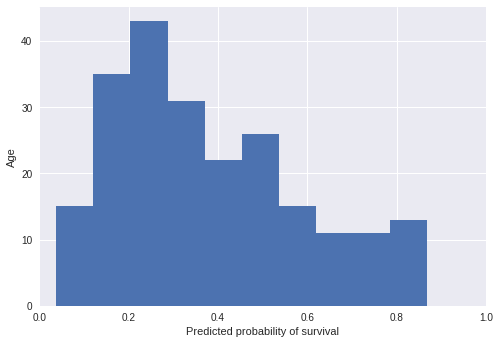

In [59]:
import matplotlib.pyplot as plt
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Age')

In [39]:
titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [28]:
titanic.groupby(['Sex', 'Survived']).count()

Pclass  Name  Age  Siblings/Spouses Aboard  \
Sex    Survived                                               
female 0             81    81   81                       81   
       1            233   233  233                      233   
male   0            464   464  464                      464   
       1            109   109  109                      109   

                 Parents/Children Aboard  Fare  
Sex    Survived                                 
female 0                              81    81  
       1                             233   233  
male   0                             464   464  
       1                             109   109

In [29]:
titanic.groupby(['Sex', 'Survived']).count()

Pclass  Name  Age  Siblings/Spouses Aboard  \
Sex    Survived                                               
female 0             81    81   81                       81   
       1            233   233  233                      233   
male   0            464   464  464                      464   
       1            109   109  109                      109   

                 Parents/Children Aboard  Fare  
Sex    Survived                                 
female 0                              81    81  
       1                             233   233  
male   0                             464   464  
       1                             109   109

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


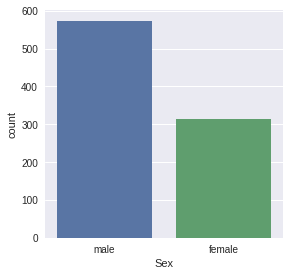

In [30]:
import seaborn as sns
sns.factorplot('Sex',data=titanic,kind='count')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


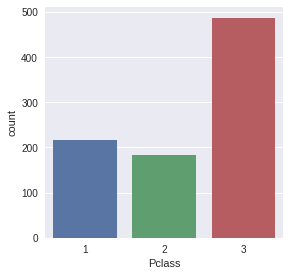

In [32]:
sns.factorplot('Pclass',data=titanic,kind='count')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


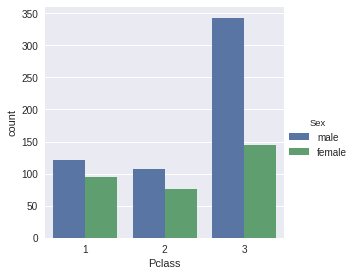

In [34]:
sns.factorplot('Pclass',data=titanic,hue='Sex',kind='count')

In [6]:
!git clone https://github.com/wxs/keras-mnist-tutorial.git

Cloning into 'keras-mnist-tutorial'...
remote: Counting objects: 26, done.
remote: Total 26 (delta 0), reused 0 (delta 0), pack-reused 26
Unpacking objects: 100% (26/26), done.


In [7]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [9]:
!pip install torch

    100% |████████████████████████████████| 496.4MB 2.4kB/s 
